   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583
Predicted per capita income for Canada in 2020: $ 41288.69409441762


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


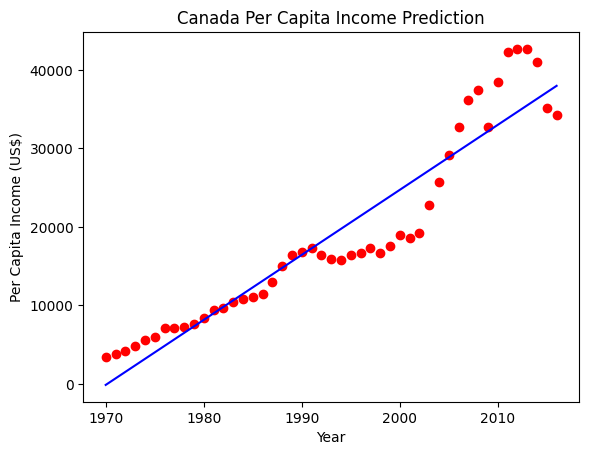

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('canada_per_capita_income.csv')

print(df.head())

# Define independent and dependent variables
X = df[['year']]      # Feature
y = df['per capita income (US$)']   # Target

# Create Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict income for 2020
predicted_income_2020 = model.predict([[2020]])

print("Predicted per capita income for Canada in 2020: $", predicted_income_2020[0])

# Optional: Visualization
plt.scatter(X, y, color='red')
plt.plot(X, model.predict(X), color='blue')
plt.title('Canada Per Capita Income Prediction')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.show()

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
Predicted salary for 12 years of experience: $ 139049.6749539778


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


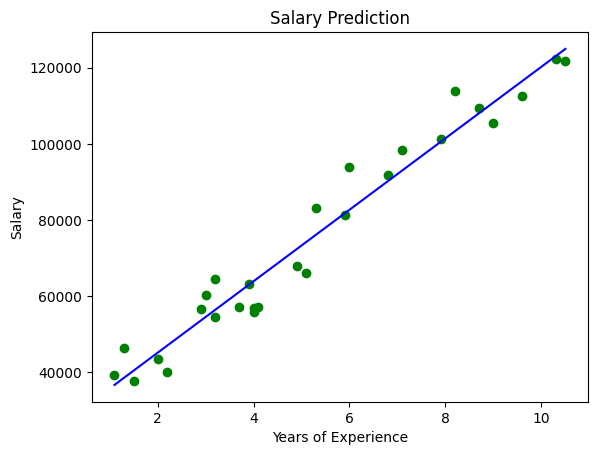

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df_salary = pd.read_csv('salary.csv')

# Handle missing values by dropping rows with NaN
df_salary.dropna(inplace=True)

print(df_salary.head())

# Define independent and dependent variables
X = df_salary[['YearsExperience']]   # Feature
y = df_salary['Salary']              # Target

# Create Linear Regression model
salary_model = LinearRegression()
salary_model.fit(X, y)

# Predict salary for 12 years experience
predicted_salary = salary_model.predict([[12]])

print("Predicted salary for 12 years of experience: $", predicted_salary[0])

# Optional: Visualization
plt.scatter(X, y, color='green')
plt.plot(X, salary_model.predict(X), color='blue')
plt.title('Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [11]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("hiring.csv")

# Display dataset
print(df)

# Data Preprocessing
# Map string experience to numerical values
word_to_num = {
    'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
    'eleven': 11, 'twelve': 12
}
df['experience'] = df['experience'].replace(word_to_num)

# Fill missing experience with 0 (after converting known strings to numbers)
df['experience'] = df['experience'].fillna(0)

# Replace missing test_score with median
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(
    df['test_score(out of 10)'].median()
)

# Define independent and dependent variables
X = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = df['salary($)']

# Create model
model = LinearRegression()
model.fit(X, y)

# Predictions
pred1 = model.predict([[2, 9, 6]])
pred2 = model.predict([[12, 10, 10]])

print("Predicted salary for (2 yr exp, 9 test, 6 interview):", pred1[0])
print("Predicted salary for (12 yr exp, 10 test, 10 interview):", pred2[0])

  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000
Predicted salary for (2 yr exp, 9 test, 6 interview): 53205.96797671033
Predicted salary for (12 yr exp, 10 test, 10 interview): 92002.18340611353


/tmp/ipython-input-2883028249.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['experience'] = df['experience'].replace(word_to_num)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/1000_Companies.csv')

print(df.head())

# Define features and target
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']

# One Hot Encoding for State column
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), ['State'])],
    remainder='passthrough'
)

X = ct.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict new value
# Create a DataFrame for the new data with matching column names
new_data_df = pd.DataFrame([{
    'R&D Spend': 91694.48,
    'Administration': 515841.3,
    'Marketing Spend': 11931.24,
    'State': 'Florida'
}])

# Transform the new DataFrame
new_data_transformed = ct.transform(new_data_df)
prediction = model.predict(new_data_transformed)

print("Predicted Profit:", prediction[0])

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
Predicted Profit: 510570.9926108249
